# II. Exploratory Data Analysis

#### Importing essential librairies

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

color = sns.color_palette()
sns.set_style('darkgrid')

#### Importing the data 

In [38]:
df = pd.read_csv("../data/glassdoor-data-engineer-cleaned.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,job_state,company_age,job_simp,seniority,job_languages,job_cloud,job_viz,job_bigdata,job_data,job_education
0,PCS Global Tech,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\n· Analyze and organize raw d...,70000.0,501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,...,CA,-1,data engineer,na,"['sql', 'python', 'java']",[],[],[],[],na
1,Futuretech Consultants LLC,4.4,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,88400.0,NaN,NaN,NaN,NaN,...,MS,-1,data engineer,na,"['sql', 'c']",[],[],[],['snowflake'],bachelor
2,Clairvoyant,4.4,Remote,Data Engineer (MDM),Required Skills:\nMust have 5-8+ Years of expe...,140400.0,51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,...,Remote,-1,data engineer,na,"['sql', 'python']",['aws'],[],['spark'],[],master
3,Apple,4.2,"Cupertino, CA",Data Engineer,"Summary\nPosted: Dec 22, 2021\nWeekly Hours: 4...",NaN,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,...,CA,47,data engineer,na,"['c', 'python']",[],['tableau'],[],[],na
4,Skytech Consultancy Services,5.0,"Baltimore, MD",Data Engineer,Description of Work:\nTechnical experience in ...,135200.0,1 to 50 Employees,Company - Public,NaN,NaN,...,MD,-1,data engineer,na,['sql'],[],['tableau'],[],[],bachelor


In [39]:
cols = ['job_languages', 'job_cloud', 'job_viz', 'job_bigdata', 'job_data']

def safe_eval(x):
    try:
        return eval(x)
    except:
        return x

df[cols] = df[cols].astype(str).applymap(safe_eval)

### Visualizing the most in demande tools for Data Engineers

In [40]:
prog_languages = ['python', 'java', 'scala', 'go', 'r', 'c', 'c++', 'sql', 'nosql']
cloud_tools = ['aws', 'azure', 'google cloud']
viz_tools = ['power bi', 'tableau']
bigdata_tools = ['spark', 'hadoop', 'flink', 'mongodb', 'gcp']
data_tools = ['kafka', 'hive', 'snowflake', 'airflow']

In [41]:
def filtered_keywords(tools, keywords, title="Keyword Analysis", head=10):
    # get keywords in a column
    count_keywords = pd.DataFrame(tools.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')
    
    # get frequency of occurrence of word (as word only appears once per line)
    length = len(tools) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = sns.barplot(x="keywords", y="percentage", data=count_keywords, palette="deep")
    plt.xlabel("")
    plt.ylabel("Likelihood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)
    print(count_keywords)

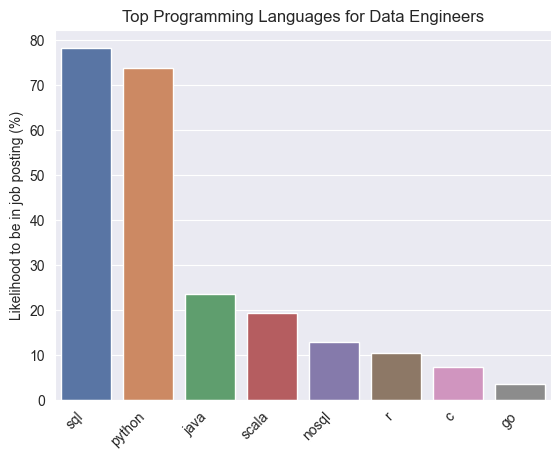

  keywords  counts  percentage
0      sql     434   78.339350
1   python     409   73.826715
2     java     130   23.465704
3    scala     107   19.314079
4    nosql      71   12.815884
5        r      58   10.469314
6        c      41    7.400722
7       go      19    3.429603


In [42]:
filtered_keywords(df['job_languages'], prog_languages, title="Top Programming Languages for Data Engineers")

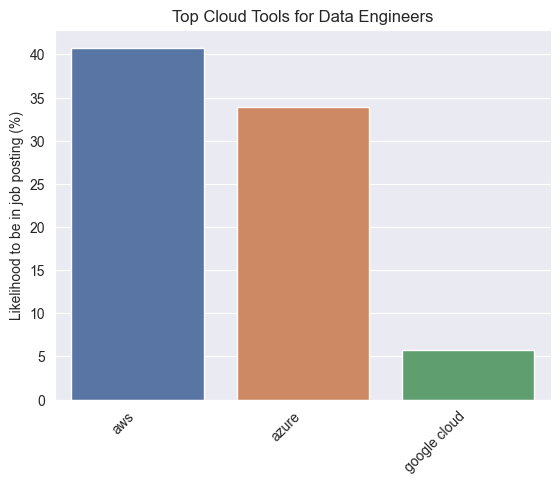

       keywords  counts  percentage
0           aws     226   40.794224
1         azure     188   33.935018
2  google cloud      32    5.776173


In [43]:
filtered_keywords(df['job_cloud'], cloud_tools, title="Top Cloud Tools for Data Engineers")

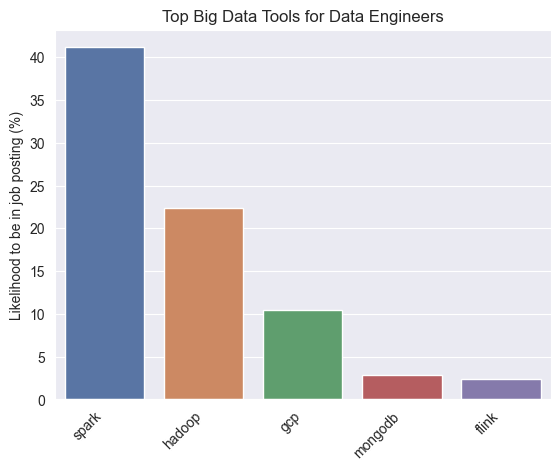

  keywords  counts  percentage
0    spark     228   41.155235
1   hadoop     124   22.382671
2      gcp      58   10.469314
3  mongodb      16    2.888087
4    flink      13    2.346570


In [44]:
filtered_keywords(df['job_bigdata'], bigdata_tools, title="Top Big Data Tools for Data Engineers")

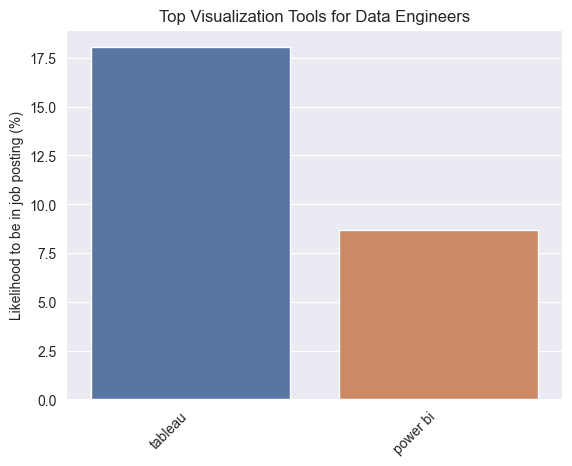

   keywords  counts  percentage
0   tableau     100   18.050542
1  power bi      48    8.664260


In [45]:
filtered_keywords(df['job_viz'], viz_tools, title="Top Visualization Tools for Data Engineers")

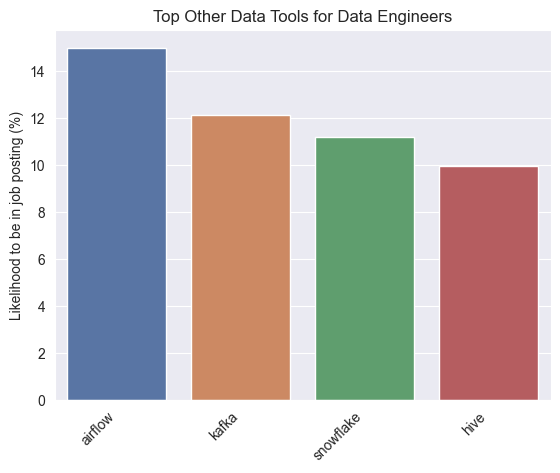

    keywords  counts  percentage
0    airflow      83   14.981949
1      kafka      67   12.093863
2  snowflake      62   11.191336
3       hive      55    9.927798


In [46]:
filtered_keywords(df['job_data'], data_tools, title="Top Other Data Tools for Data Engineers")

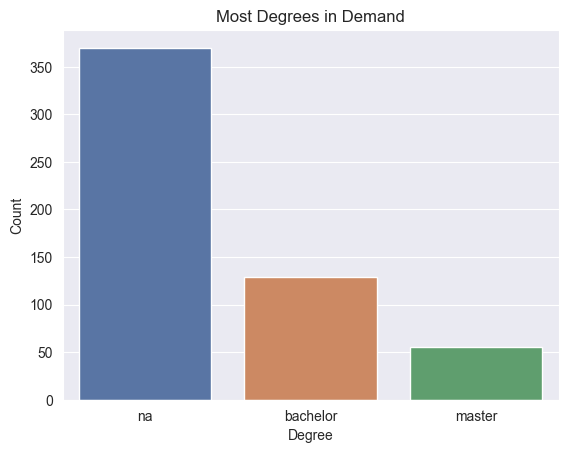

In [47]:
sns.countplot(data=df, x='job_education', palette="deep")

plt.title('Most Degrees in Demand')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()

Companies that are recruiting Data Engineers the most in Glassdoor (March 2023) 

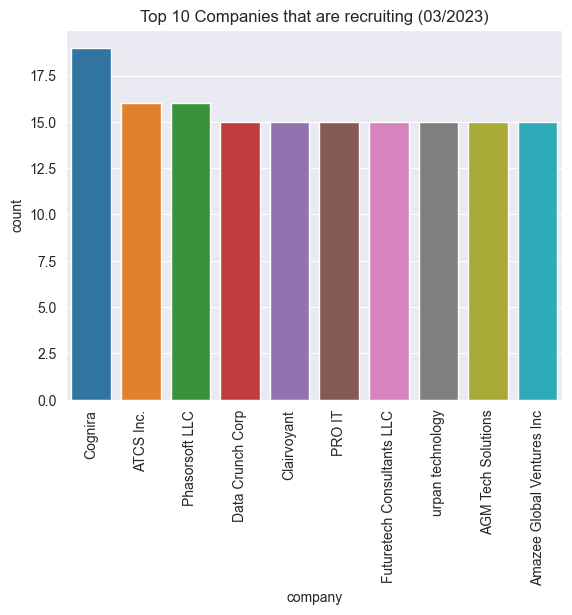

In [48]:
top10 = df['company'].value_counts().head(10)
sns.countplot(x='company', order=top10.index, data=df)
plt.title("Top 10 Companies that are recruiting (03/2023)")
plt.xticks(rotation=90)
plt.show()

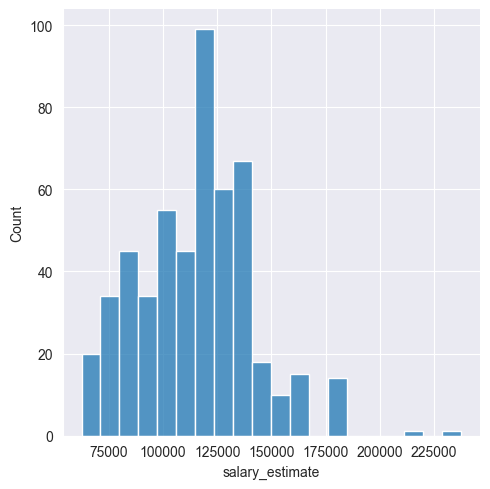

In [49]:
sns.displot(df['salary_estimate'])

<Axes: xlabel='company_rating', ylabel='Count'>

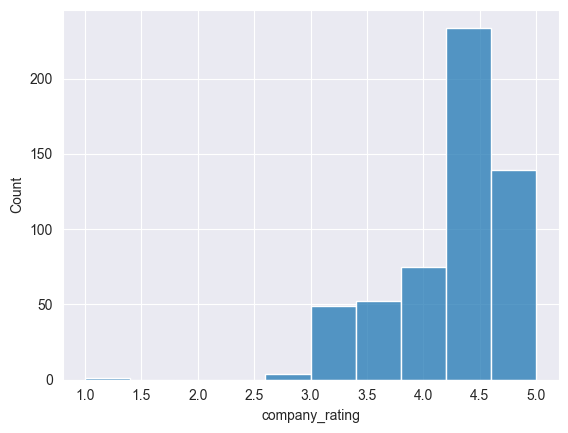

In [50]:
sns.histplot(df['company_rating'], bins=10)

<Axes: xlabel='company_age', ylabel='Count'>

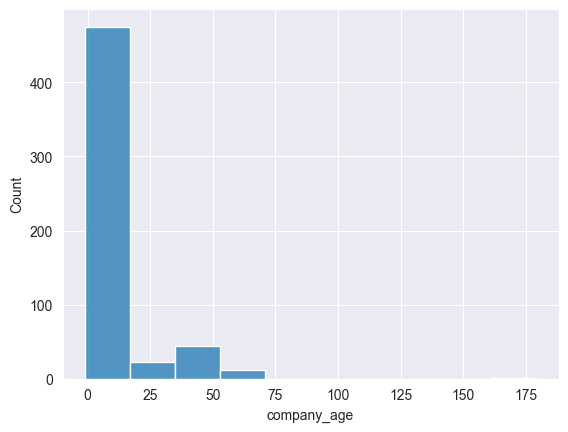

In [51]:
sns.histplot(df['company_age'], bins=10)

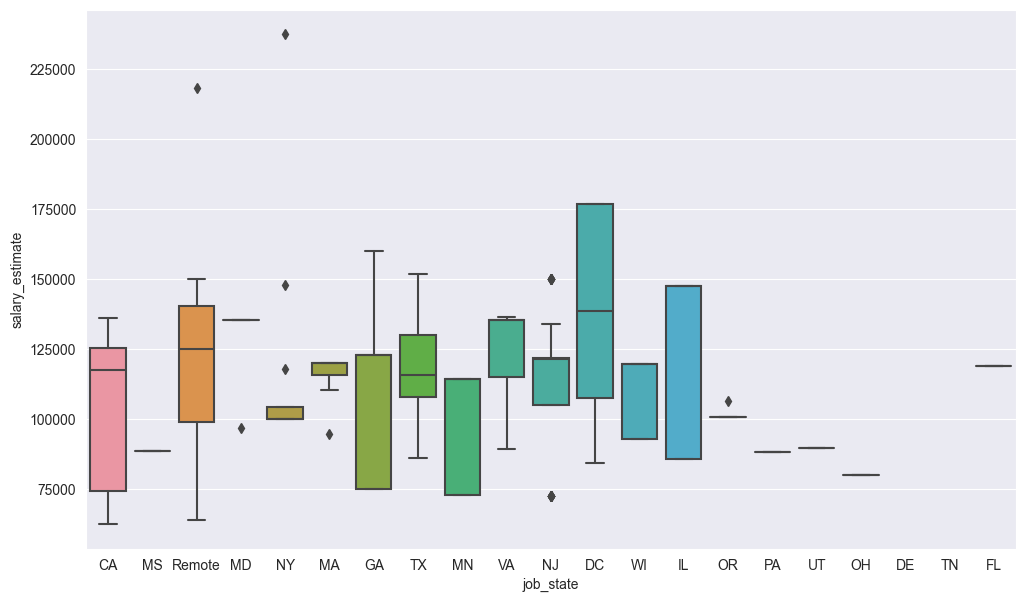

In [52]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.boxplot(data=df, x='job_state', y='salary_estimate')
plt.show()

Getting rid of the outliers

In [53]:
df = df[df['salary_estimate'] <= 200000]

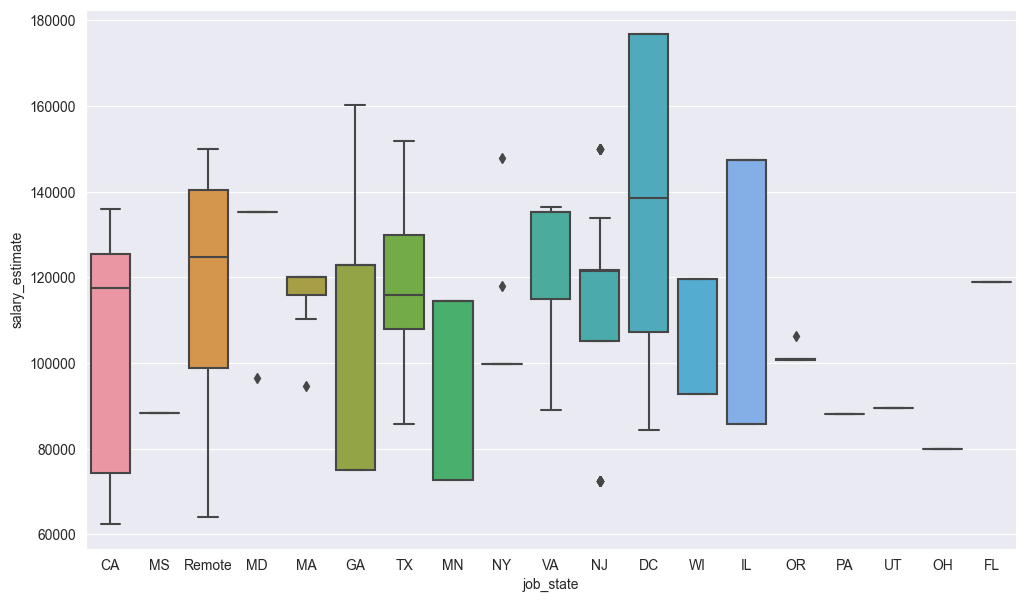

In [54]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.boxplot(data=df, x='job_state', y='salary_estimate')
plt.show()

In [55]:
df_cat = df[['job_state', 'seniority', 'company_revenue', 'company_age', 'company_industry', 'company_sector', 'company_type', 'company_size']]

graph for job_state: total = 19


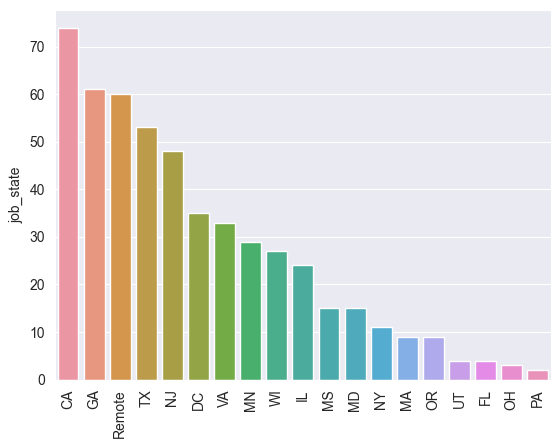

graph for seniority: total = 2


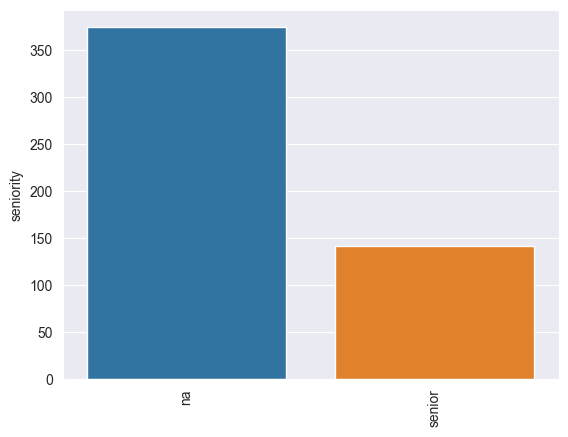

graph for company_revenue: total = 9


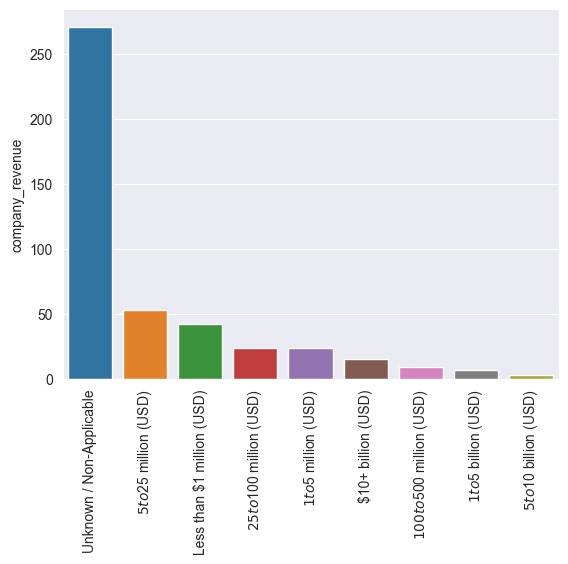

graph for company_age: total = 29


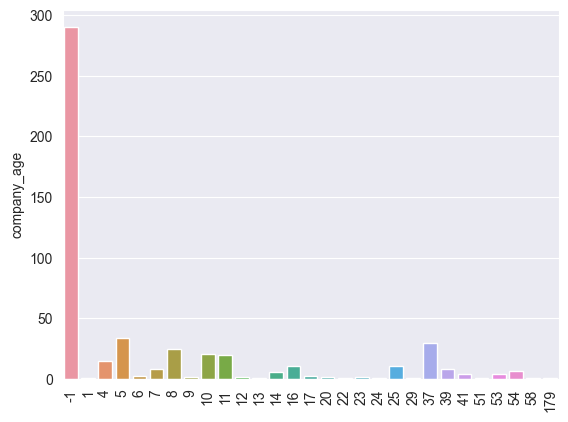

graph for company_industry: total = 23


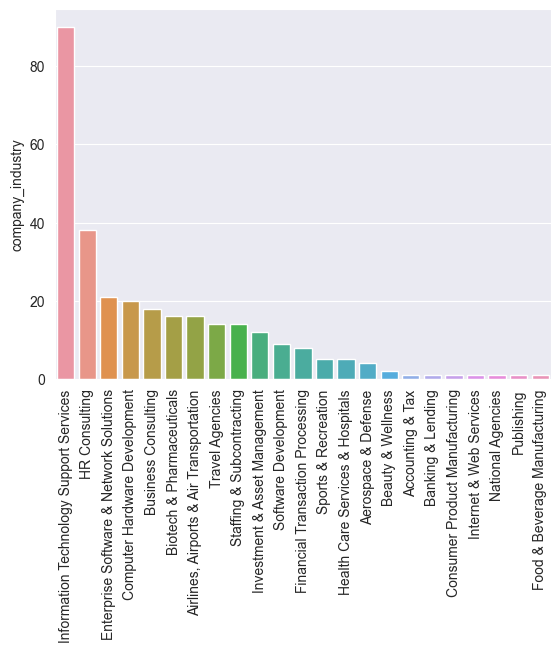

graph for company_sector: total = 14


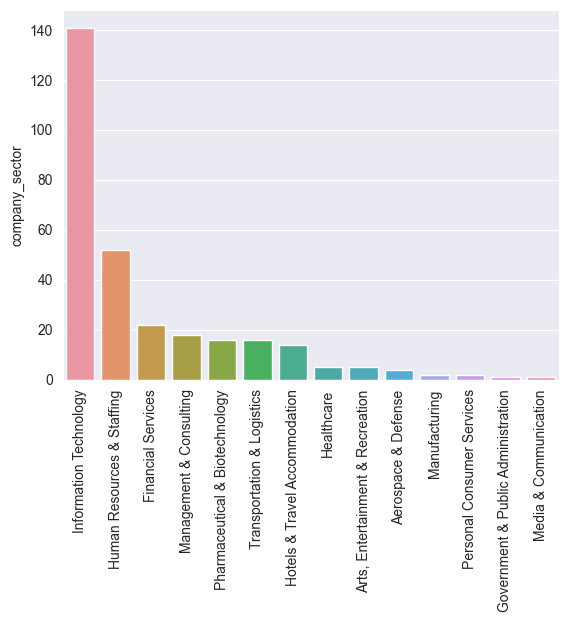

graph for company_type: total = 5


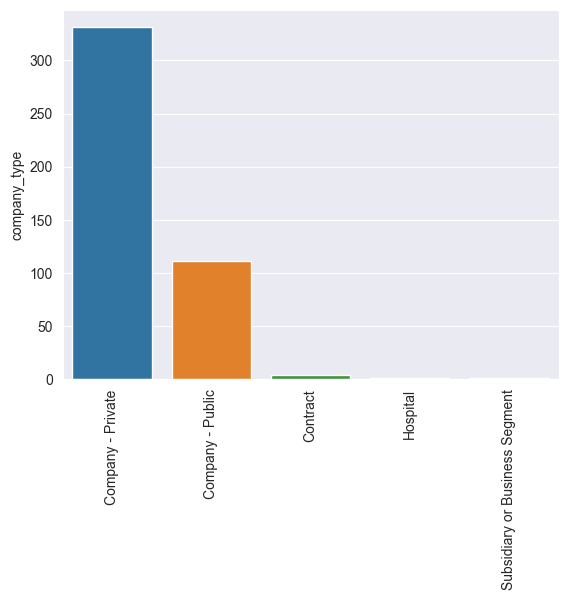

graph for company_size: total = 7


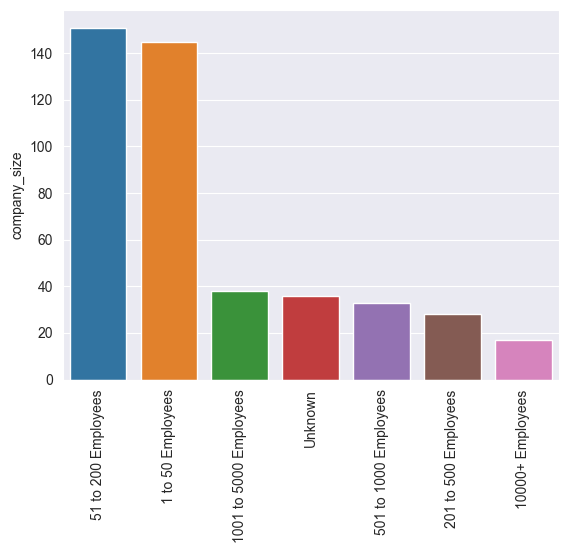

In [56]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Correlation Matrix

<Axes: >

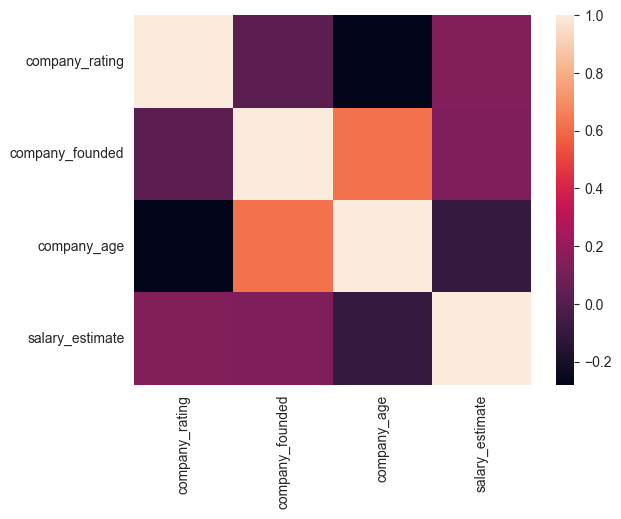

In [57]:
sns.heatmap(df[['company_rating', 'company_founded', 'company_age', 'salary_estimate']].corr())

Seeing how the salary estimate changes based on different variables

In [58]:
pd.pivot_table(df, index = 'job_simp', values = 'salary_estimate').applymap('{:.2f}'.format)

,salary_estimate
job_simp,
data engineer,114486.99


In [59]:
pd.pivot_table(df, index = 'job_education', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
job_education,
master,132279.94
bachelor,115909.40
na,111536.19


In [60]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'salary_estimate').applymap('{:.2f}'.format)

salary_estimate
job_simp      seniority                
data engineer na              110844.54
              senior          124080.50

In [61]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'salary_estimate').sort_values('job_state', ascending = False).applymap('{:.2f}'.format)

,,salary_estimate
job_state,job_simp,
WI,data engineer,106717.96
VA,data engineer,124020.42
UT,data engineer,89485.00
TX,data engineer,114117.14
Remote,data engineer,122098.47
PA,data engineer,88151.00
OR,data engineer,101394.44
OH,data engineer,80000.00
NY,data engineer,105885.09


In [62]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'salary_estimate', aggfunc = 'count').sort_values('salary_estimate', ascending = False)

,,salary_estimate
job_state,job_simp,
CA,data engineer,74
GA,data engineer,61
Remote,data engineer,60
TX,data engineer,53
NJ,data engineer,48
DC,data engineer,35
VA,data engineer,33
MN,data engineer,29
WI,data engineer,27


In [63]:
pd.pivot_table(df, index = 'company_sector', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_sector,
Hotels & Travel Accommodation,147500.00
Human Resources & Staffing,140476.92
Pharmaceutical & Biotechnology,138813.81
Management & Consulting,115861.33
Media & Communication,110394.00
Financial Services,105188.32
Information Technology,103833.77
"Arts, Entertainment & Recreation",101755.00
Manufacturing,101648.50


In [64]:
df.columns

Index(['company', 'company_rating', 'location', 'job_title', 'job_description',
       'salary_estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'company_founded', 'company_revenue', 'job_state',
       'company_age', 'job_simp', 'seniority', 'job_languages', 'job_cloud',
       'job_viz', 'job_bigdata', 'job_data', 'job_education'],
      dtype='object')

In [65]:
pd.pivot_table(df, index = 'company_industry', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_industry,
HR Consulting,148168.42
Travel Agencies,147500.00
Biotech & Pharmaceuticals,138813.81
Banking & Lending,135927.00
Enterprise Software & Network Solutions,119671.10
Staffing & Subcontracting,119600.00
Software Development,116983.11
Business Consulting,115861.33
Consumer Product Manufacturing,115797.00


In [66]:
pd.pivot_table(df, index = 'company_size', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_size,
Unknown,121561.89
51 to 200 Employees,120638.15
201 to 500 Employees,119581.93
1 to 50 Employees,118475.23
1001 to 5000 Employees,111582.68
10000+ Employees,105130.88
501 to 1000 Employees,77412.42


In [67]:
pd.pivot_table(df, index = 'company_revenue', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_revenue,
$100 to $500 million (USD),145599.33
$5 to $10 billion (USD),136660.00
Less than $1 million (USD),124126.79
$25 to $100 million (USD),121187.92
$5 to $25 million (USD),120056.43
Unknown / Non-Applicable,114123.41
$10+ billion (USD),102985.93
$1 to $5 billion (USD),98800.00
$1 to $5 million (USD),97197.25


In [68]:
pd.pivot_table(df, index = 'company_type', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_type,
Subsidiary or Business Segment,151840.00
Company - Public,123704.87
Company - Private,112935.50
Hospital,94536.00
Contract,85625.00


Let's build a wordcloud to show relative importance of the words in the job description

In [69]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

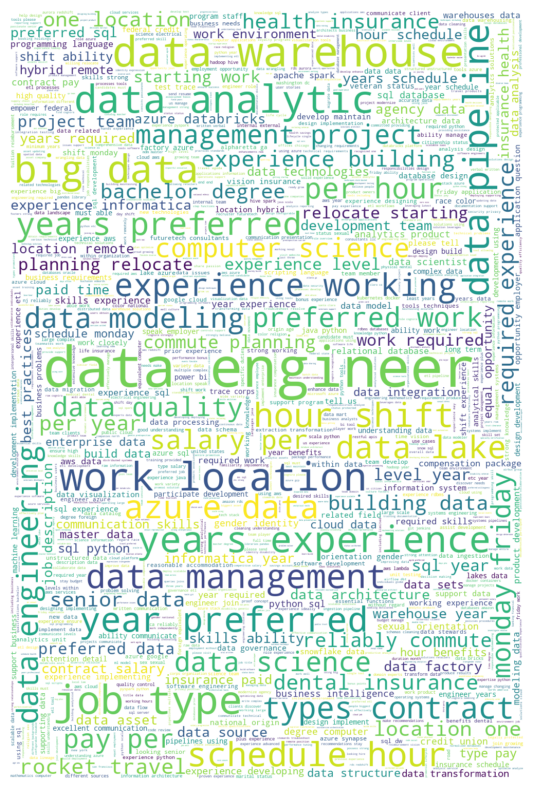

In [71]:
words = " ".join(df['job_description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 1000, width=1000, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [72]:
data_path = '../data/'

df.to_csv(data_path + "glassdoor-data-engineer-eda.csv", index=False)